In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


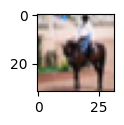

In [4]:
plt.figure(figsize=(10,1))
plt.imshow(X_train[11])

In [5]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
classes[y_train[11][0]]

'horse'

In [6]:
# scaling training samples
X_train = X_train/256
X_test = X_test/256

In [7]:
y_train[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [8]:
# one-hot-encoding categorical values (i.e y)
y_train = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)

y_test = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

y_train[:3]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3200, activation='relu'),
    keras.layers.Dense(1200, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', # since y is one hot encoded else for classification we use sparse_categorical_crossentropy
    metrics=['accuracy']  
)

model.fit(X_train, y_train, epochs=1)

1563/1563 [==============================] - 104s 66ms/step - loss: 1.8119 - accuracy: 0.3558


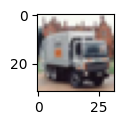

In [10]:
plt.figure(figsize=(10,1))
plt.imshow(X_test[11])

In [11]:
model.predict(X_test)[11]

313/313 [==============================] - 5s 17ms/step


array([0.26474538, 0.91526335, 0.1678046 , 0.28127587, 0.10822982,
       0.29536375, 0.30627394, 0.39758238, 0.77875817, 0.9409113 ],
      dtype=float32)

In [12]:
np.argmax(model.predict(X_test)[11])

313/313 [==============================] - 6s 18ms/step


9

In [13]:
classes[np.argmax(model.predict(X_test)[11])]

313/313 [==============================] - 6s 18ms/step


'truck'